In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
wine_data=pd.read_csv("winequality-red.csv")
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [320]:
#description of the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## DATA PREPROCESSING

In [321]:
wine_data.shape

(1599, 12)

In [322]:
wine_data.select_dtypes(include=['number']).columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [323]:
wine_data.select_dtypes(include=['object']).columns.tolist()

[]

In [324]:
wine_data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [325]:
#number of missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [326]:
#Splitting Data
from sklearn.model_selection import train_test_split
x=wine_data.iloc[:,:-1].values
y=wine_data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 7.3    0.32   0.23  ...  3.43   0.62  10.1  ]
 [ 8.3    0.675  0.26  ...  3.31   0.53   9.2  ]
 [12.5    0.38   0.6   ...  3.1    0.73  10.5  ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]]
[[ 8.8    0.41   0.64  ...  3.54   0.66  10.5  ]
 [ 8.7    0.63   0.28  ...  3.26   0.63  10.2  ]
 [10.4    0.34   0.58  ...  3.19   0.7   11.3  ]
 ...
 [ 7.2    0.36   0.46  ...  3.4    0.85  11.   ]
 [ 5.6    0.615  0.    ...  3.58   0.52   9.9  ]
 [11.8    0.33   0.49  ...  3.3    0.76  10.7  ]]
[5 4 5 ... 6 6 8]
[5 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 6 5 5 5 6 6 5 6 6 6 6 6 6 7 6 6 5 6 5 6 5
 7 6 5 6 5 5 6 5 6 5 5 5 6 5 4 7 5 5 6 6 6 5 5 5 6 5 6 5 6 7 6 6 6 5 6 6 6
 5 5 6 6 5 6 5 5 5 6 5 5 5 7 5 6 5 7 5 6 5 5 6 5 3 6 5 5 5 5 5 5 6 6 5 6 7
 5 6 6 5 7 5 5 5 5 4 7 7 5 5 5 6 5 7 7 6 5 7 5 6 7 5 7 6 6 5 6 6 5 6 6 6 5
 6 6 6 6 5 6 5 7 5 6 6 6 8 6 5 5 6 6 4 5 5 6 6 6 4 7 5 6 5 5 5 5 6 6 5 6 6
 6 7 6 

In [327]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
print(x_train)
print(x_test)

[[-0.56794375 -1.18088385 -0.19241296 ...  0.73249574 -0.22553894
  -0.31915735]
 [-0.00940983  0.80065564 -0.04123135 ... -0.03016065 -0.75844691
  -1.15783431]
 [ 2.33643265 -0.84597577  1.67216021 ... -1.36480934  0.42579302
   0.05358797]
 ...
 [-0.9589175   1.07974571 -0.89792713 ...  0.22405814 -0.9952949
   0.33314696]
 [-0.62379715  0.54947458 -1.35147195 ...  0.35116754 -0.46238693
  -1.34420697]
 [ 0.43741731 -0.73433974  1.16822152 ... -0.66570765  0.18894504
   1.91731456]]
[[ 2.98410648e-01 -5.98664809e-01  1.97121898e+00 ...  1.66041846e+00
   9.78679995e-03  1.30356137e-01]
 [ 2.35188053e-01  6.36708698e-01  3.55273072e-03 ... -2.78554196e-01
  -1.65499169e-01 -1.58255236e-01]
 [ 1.30997217e+00 -9.91738198e-01  1.64327460e+00 ... -7.63297359e-01
   2.43501426e-01  8.99986465e-01]
 ...
 [-7.13150871e-01 -8.79431516e-01  9.87385854e-01 ...  6.90932130e-01
   1.11993127e+00  6.11375092e-01]
 [-1.72471239e+00  5.52478686e-01 -1.52685435e+00 ...  1.93741455e+00
  -8.08214390e

In [328]:
#Printing Outliers
lowerLimit=wine_data['quality'].quantile(0.25)
upperLimit=wine_data['quality'].quantile(0.75)
print(wine_data[wine_data['quality']<lowerLimit])
print(wine_data[wine_data['quality']>upperLimit])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18              7.4             0.590         0.08             4.4      0.086   
38              5.7             1.130         0.09             1.5      0.172   
41              8.8             0.610         0.30             2.8      0.088   
45              4.6             0.520         0.15             2.1      0.054   
73              8.3             0.675         0.26             2.1      0.084   
...             ...               ...          ...             ...        ...   
1480            5.6             0.620         0.03             1.5      0.080   
1482            7.2             0.580         0.54             2.1      0.114   
1484            6.8             0.910         0.06             2.0      0.060   
1505            6.7             0.760         0.02             1.8      0.078   
1521            6.9             0.480         0.20             1.9      0.082   

      free sulfur dioxide  

In [329]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [330]:
#Data Binning
def binningFunction(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin
cut_points=[2.2,5]
labels=["Low RS","Neutral RS","High RS"]
wine_data["Sugar Content"]=binningFunction(wine_data["residual sugar"],cut_points,labels)
wine_data

[0.9, 2.2, 5, 15.5]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Sugar Content
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low RS
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Neutral RS
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Neutral RS
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Low RS
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Low RS
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Low RS
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Neutral RS
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Low RS


In [331]:
#Duplicated records
wine_data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [332]:
#Correlation between the features
(wine_data.select_dtypes(include=['number'])).corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [333]:
#Removing Duplicates
wine_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Sugar Content
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low RS
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Neutral RS
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Neutral RS
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Low RS
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,Low RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,Low RS
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Low RS
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Low RS
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Low RS


In [334]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Sugar Content
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low RS
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Neutral RS
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Neutral RS
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Low RS
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Low RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Low RS
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Low RS
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Neutral RS
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Low RS


## DATA VISUALISATION

C:\Users\user\AppData\Local\Temp\ipykernel_1244\418275274.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  low=wine_data.loc[wine_data["Sugar Content"]=="Low RS"].count()[0]
C:\Users\user\AppData\Local\Temp\ipykernel_1244\418275274.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neutral=wine_data.loc[wine_data["Sugar Content"]=="Neutral RS"].count()[0]
C:\Users\user\AppData\Local\Temp\ipykernel_1244\418275274.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

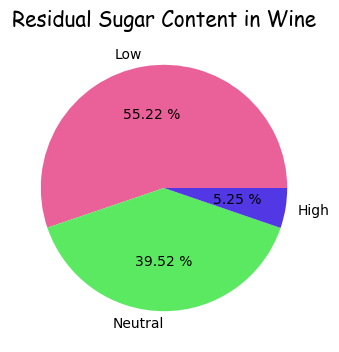

In [335]:
plt.figure(figsize=(6,4))
low=wine_data.loc[wine_data["Sugar Content"]=="Low RS"].count()[0]
neutral=wine_data.loc[wine_data["Sugar Content"]=="Neutral RS"].count()[0]
high=wine_data.loc[wine_data["Sugar Content"]=="High RS"].count()[0]
labels=["Low","Neutral","High"]
colors=["#EA6098","#5AE961","#5238E5"]
plt.pie([low,neutral,high],labels=labels,colors=colors,autopct="%.2f %%")
plt.title("Residual Sugar Content in Wine",fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1244\2860426707.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quality_3=wine_data.loc[wine_data["quality"]==3].count()[0]
C:\Users\user\AppData\Local\Temp\ipykernel_1244\2860426707.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quality_4=wine_data.loc[wine_data["quality"]==4].count()[0]
C:\Users\user\AppData\Local\Temp\ipykernel_1244\2860426707.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

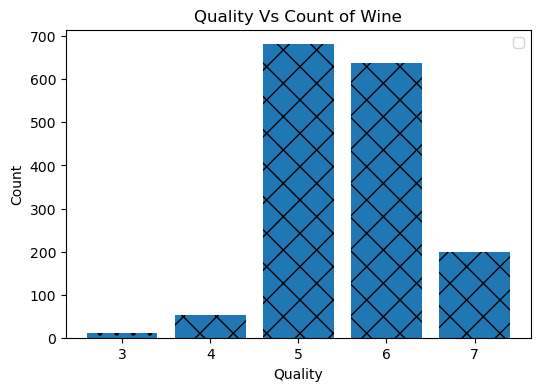

In [336]:
plt.figure(figsize=(6,4))
quality_3=wine_data.loc[wine_data["quality"]==3].count()[0]
quality_4=wine_data.loc[wine_data["quality"]==4].count()[0]
quality_5=wine_data.loc[wine_data["quality"]==5].count()[0]
quality_6=wine_data.loc[wine_data["quality"]==6].count()[0]
quality_7=wine_data.loc[wine_data["quality"]==7].count()[0]
values=[quality_3,quality_4,quality_5,quality_6,quality_7]
labels=["3","4","5","6","7"]
bars=plt.bar(labels,values)
patterns=['.','X','X','X','X']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
plt.title("Quality Vs Count of Wine")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend()
plt.show()

<Axes: xlabel='alcohol', ylabel='pH'>

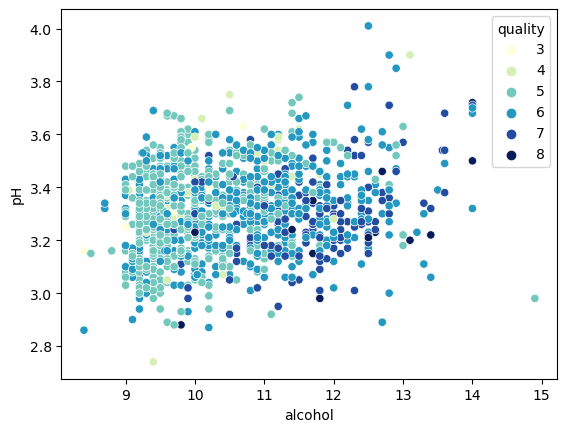

In [337]:
sns.scatterplot(x="alcohol",y="pH",data=wine_data,hue="quality",palette="YlGnBu")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

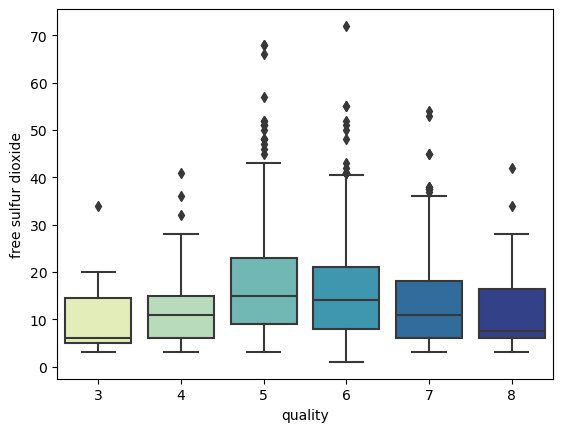

In [338]:
sns.boxplot(x="quality",y="free sulfur dioxide",data=wine_data,palette="YlGnBu")

C:\Users\Install_apps_user\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='citric acid', ylabel='Count'>

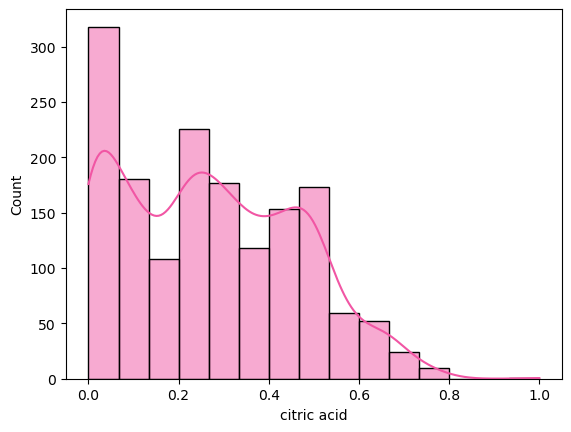

In [349]:
sns.histplot(wine_data["citric acid"],kde=True,bins=15,color="#F156A4")

<Axes: >

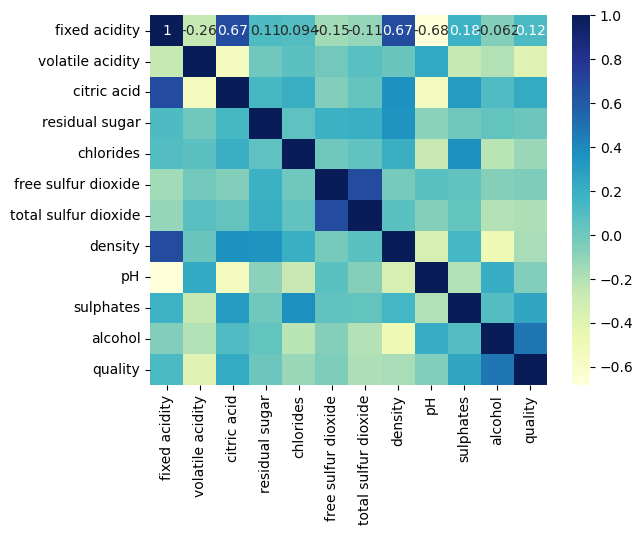

In [348]:
sns.heatmap(wine_data.select_dtypes(['number']).corr(),annot=True,cmap="YlGnBu")